# Import Dataset

In [8]:
lr=[2e-3,3e-3,5e-3]
min(lr)

0.002

In [1]:
import gc
gc.collect()
import subprocess as sp
import os
def get_gpu_memory():
    command = "nvidia-smi --query-gpu=memory.free --format=csv"
    memory_free_info = sp.check_output(command.split()).decode('ascii').split('\n')[:-1][1:]
    memory_free_values = [int(x.split()[0]) for i, x in enumerate(memory_free_info)]
    return memory_free_values

get_gpu_memory()

[4324]

In [1]:
import json
from nltk.corpus import stopwords
import re
import json
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
f = open('/data/data_codebook.json')
data_codebook = json.load(f)
super_set={}
for s in data_codebook:
    if s[2]!="domain_name":
        if s[2] not in super_set:
            super_set[s[2]]=[]
        if s[5] not in super_set[s[2]]:
            super_set[s[2]].append(s[5])

In [2]:
import json
f = open('/data/metadata.json')
metadata = json.load(f)
a = open('/data/annotations.json')
annotations = json.load(a)
#combine 
dataset={}
for s in metadata:
    if s['items'][0]['annotations']==None:
        pass
    else:
        if s['items'][0]['annotations']!=False:
            s=s['items'][0]
            for text in annotations:
                text=text['items'][0]
                if s['manifesto_id']==text['key']:
                    if s['manifesto_id'] not in dataset:
                        dataset[s['manifesto_id']]={}
                    dataset[s['manifesto_id']]["metadata"]=s
                    dataset[s['manifesto_id']]["annotation"]=text
#create dataset
data_codebook_dict={}
for s in data_codebook:
    data_codebook_dict[s[3]]=s[5]
dataset_right={}
for k,v in dataset.items():
    main_annotation={}
    main_annotation['key']= v['annotation']['key']
    if "sentences" not in main_annotation:
        main_annotation["sentences"]={}
    for s in v['annotation']["items"]:
        if s['cmp_code'] in data_codebook_dict:
            name=data_codebook_dict[s['cmp_code']]
        main_annotation["sentences"][s['text']]=name
    if k not in dataset_right:
        dataset_right[k]={}
    dataset_right[k]['metadata']=v['metadata']
    dataset_right[k]['annotation']=main_annotation

In [89]:
domains_count={}
general_number_labels=0
for k,v in super_set.items():
    print(k,len(v))
    general_number_labels+=len(v)
    if k!="NA":
        domains_count[k]=len(v)

NA 1
External Relations 27
Freedom and Democracy 17
Political System 17
Economy 27
Welfare and Quality of Life 11
Fabric of Society 29
Social Groups 11


In [90]:
sum(domains_count.values())

139

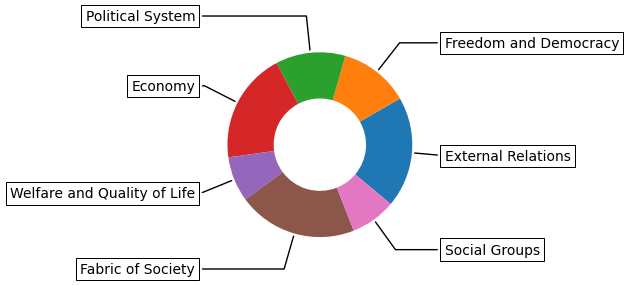

In [38]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = list(domains_count.keys())

data = list(domains_count.values())

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)


plt.show()

In [5]:
balanced_dataset_140={}
for k,v in data_codebook_dict.items():
    if v!="title" and v!='No other category applies':
        balanced_dataset_140[v]=[]
for k,v in dataset_right.items():
    for key,value in v['annotation']['sentences'].items():
            if value in balanced_dataset_140:
                if value in balanced_dataset_140:
                    balanced_dataset_140[value].append(key)

In [91]:
count={}
for k,v in dataset_right.items():
    for key,value in v['annotation']['sentences'].items():
        if value not in count:
            count[value]=0
        count[value]+=1

In [95]:
len(count)

133

In [94]:
sum(count.values())

1623580

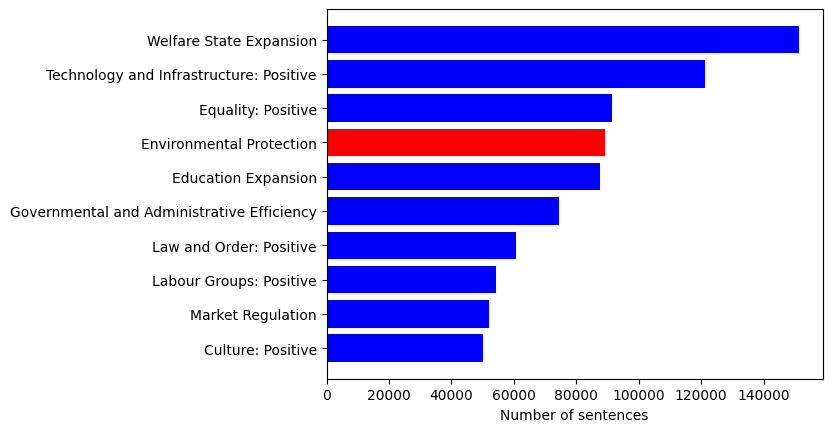

In [36]:
general_count= dict(sorted(count.items(), key=lambda item: item[1],reverse=True))
general_count={A:N for (A,N) in [x for x in general_count.items()][:10]}
general_count= dict(sorted(general_count.items(), key=lambda item: item[1]))
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
objects = general_count.keys()
y_pos = np.arange(len(general_count))
performance = general_count.values()
plt.barh(y_pos, performance, align='center', alpha=0.5,color=['blue','blue','blue','blue','blue','blue',"red",'blue','blue','blue'])
plt.yticks(y_pos, objects)
plt.xlabel('Number of sentences')
plt.show()

In [60]:
count_sentences_domains={}
for key,value in super_set.items():
    if key!="NA":
        if key not in count_sentences_domains:
            count_sentences_domains[key]=0
        for category in value:
            if category in count:
                count_sentences_domains[key]+=count[category]

In [73]:
count_sentences_domains

{'External Relations': 117708,
 'Freedom and Democracy': 102202,
 'Political System': 176488,
 'Economy': 406425,
 'Welfare and Quality of Life': 482586,
 'Fabric of Society': 180695,
 'Social Groups': 146067}

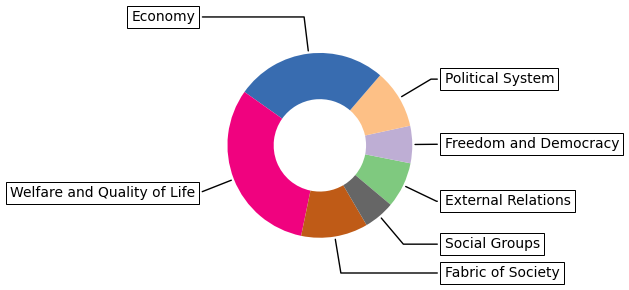

In [84]:
# Define a color palette using a colormap
cmap = plt.get_cmap('Accent')  # You can choose a different colormap

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = list(count_sentences_domains.keys())
data = list(count_sentences_domains.values())

# Generate colors from the colormap
colors = cmap(np.linspace(0, 1, len(data)))

wedges, texts = ax.pie(data, colors=colors, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35 * np.sign(x), 1.4 * y),
                horizontalalignment=horizontalalignment, **kw)

plt.show()

In [75]:
with open('train_dataset.json', 'r') as fp:
    train_dataset = json.load(fp)

In [87]:
c=0
for k,v in train_dataset.items():
    c+=len(v)

In [85]:
count_sentences_domains_2={}
for key,value in super_set.items():
    if key!="NA":
        if key not in count_sentences_domains_2:
            count_sentences_domains_2[key]=0
        for category in value:
            if category in train_dataset:
                count_sentences_domains_2[key]+=len(train_dataset[category])

In [86]:
count_sentences_domains_2

{'External Relations': 74614,
 'Freedom and Democracy': 60866,
 'Political System': 95966,
 'Economy': 247184,
 'Welfare and Quality of Life': 294428,
 'Fabric of Society': 109116,
 'Social Groups': 50809}

In [154]:
def percentage(part, whole):
    return 100 * float(part)/float(whole)

general_number_documents_years={}
EP_documents_years={}
EP_percent_years={}
just_percent={}
for k,v in dataset_right.items():
    year=v['metadata']['election_date'][:-2]
    annotation=v['annotation']['sentences']
    if year not in general_number_documents_years:
        general_number_documents_years[year]=0
    general_number_documents_years[year]+=1
    count_general=0
    count_ep=0
    for sentence,label in annotation.items():
        count_general+=1
        if label=="Environmental Protection":
            count_ep+=1
            Flag=True
    ep_percent=round(percentage(count_ep,count_general))
    if year not in just_percent:
        just_percent[year]={}
    if "general_sentences" not in just_percent[year]:
        just_percent[year]["general_sentences"]=0
    if "ep_sentences" not in just_percent[year]:
        just_percent[year]["ep_sentences"]=0
    just_percent[year]["general_sentences"]+=count_general
    just_percent[year]["ep_sentences"]+=count_ep
    if ep_percent>=5:
        if year not in EP_percent_years:
            EP_percent_years[year]=0
        EP_percent_years[year]+=1
    if count_ep>=1:
        if year not in EP_documents_years:
            EP_documents_years[year]=0
        EP_documents_years[year]+=1

new_EP_percent_years_sorted={}
for s in EP_documents_years_sorted:
    if s not in EP_percent_years_sorted:
        new_EP_percent_years_sorted[s]=0
    else:
        new_EP_percent_years_sorted[s]=EP_percent_years_sorted[s]

EP_documents_years_sorted={k: v for k, v in sorted(EP_documents_years.items(), key=lambda item: item[0])}
EP_percent_years_sorted={k: v for k, v in sorted(new_EP_percent_years_sorted.items(), key=lambda item: item[0])}

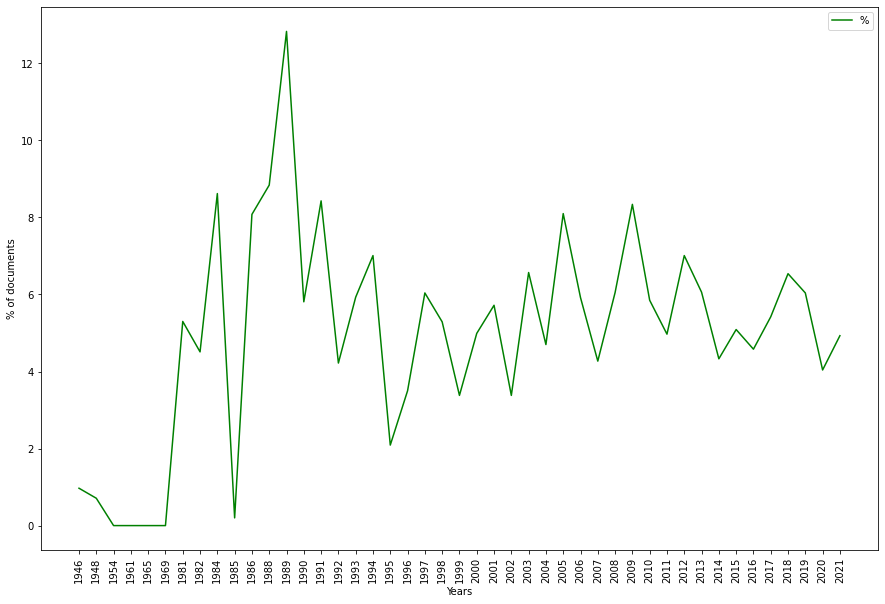

In [172]:
import matplotlib.pyplot as plt

ep_percent_dictionary={}
for k,v in just_percent.items():
    percent=round(percentage(v['ep_sentences'],v['general_sentences']),2)
    ep_percent_dictionary[k]=percent
ep_percent_dictionary_sorted={k: v for k, v in sorted(ep_percent_dictionary.items(), key=lambda item: item[0])}

names = list(ep_percent_dictionary_sorted.keys())
values = list(ep_percent_dictionary_sorted.values())

# Create a larger figure and axis (change figsize to your desired size)
fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the width and height as needed

# Plot the first line (blue)
ax.plot(names,values, label='%', color='green')

# Add labels and a legend
ax.set_xlabel('Years')
ax.set_ylabel('% of documents')
ax.legend()

plt.xticks(rotation=90)
# Show the plot
plt.show()

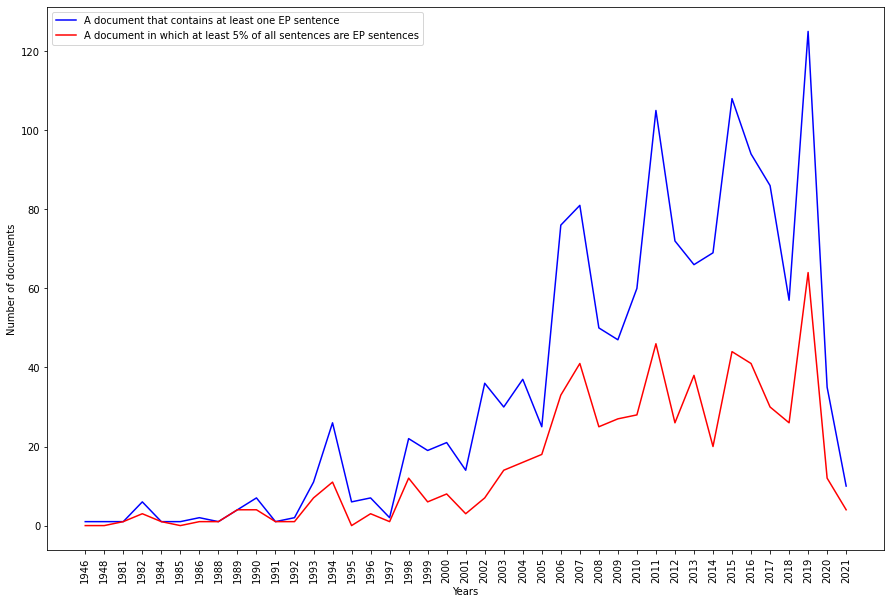

In [160]:
import matplotlib.pyplot as plt

# Sample data for the lines
x = list(EP_documents_years_sorted.keys())
y1 = list(EP_documents_years_sorted.values()) 
y2 = list(EP_percent_years_sorted.values())

# Create a larger figure and axis (change figsize to your desired size)
fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the width and height as needed

# Plot the first line (blue)
ax.plot(x, y1, label='A document that contains at least one EP sentence', color='blue')

# Plot the second line (red)
ax.plot(x, y2, label="A document in which at least 5% of all sentences are EP sentences", color='red')

# Add labels and a legend
ax.set_xlabel('Years')
ax.set_ylabel('Number of documents')
ax.legend()

plt.xticks(rotation=90)
# Show the plot
plt.show()
